<a href="https://colab.research.google.com/github/samibahig/RecoverProject/blob/main/svmProteomique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import sklearn
import os
plt.style.use('ggplot')
#print('\nMETADATA :')
data_path = ''
metadata_filename = data_path + '/content/metadata.csv'
meta_df = pd.read_csv(metadata_filename)
#print(meta_df.columns)
meta_df.columns = ['#', 'plate', '-', 'symptoms'] + list(meta_df)[4:]
#print(meta_df.columns)
#print('available metadata :', list(meta_df))
meta_idx = meta_df['ID'].to_list()
meta_label = meta_df['symptoms'].to_list()
#print('------------------')
#print(list(zip(meta_idx, meta_label)))
#print('------------------')
meta_id_label_dict = {str(k): 1 if v=='S' else 0 for k, v in zip(meta_idx, meta_label)}
data_path = ''

#DF1 : proteomics
#print('\nPROEOMICS DATA :')
proteomics_data_filename = '/content/proteomics.csv'

dim_df = pd.read_csv(proteomics_data_filename, nrows=1)
#print('--------')
#print(dim_df)
#print('--------')
dim = len(list(dim_df))
#print(dim)
#print('------------')
print('# of columns in source csv file :', dim)
all_cols = [i for i in range(dim)]

print('--------')
feat_cols = all_cols[1:-4]
print(feat_cols)
print('--------')
samplesidx_col = [0]

feat_df = pd.read_csv(proteomics_data_filename, skiprows=4, nrows=1, dtype=str, usecols=feat_cols)
features = list(feat_df)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])

idx_df = pd.read_csv(proteomics_data_filename, skiprows=6, index_col=0, skipfooter=4, usecols=[0], engine='python')
idx = list(idx_df.index.values)
print('# of idx : ', len(idx))
print('first id :', idx[0])
print('last id :', idx[-1])

df1 = pd.read_csv(proteomics_data_filename, skiprows=6, dtype=np.float32, skipfooter=4, usecols=feat_cols, engine='python')
assert df1.shape[0] == len(idx)
assert df1.shape[1] == len(features)

df1['idx'] = idx
df1.set_index('idx', inplace=True)
df1.columns = features
print('# of Nan values :', df1.isna().sum().sum())

#clean data of samples that are not in metadata :
idx = df1.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df1['label'] = y
df1 = df1[df1.label != 'to_remove']

#create X and y matrices for ML :
y = list(df1['label'])
del df1['label']
print('---------')
print(df1)
print('---------')
X = df1.to_numpy()
print('proteomics data :')
print('# of samples : ', df1.shape[0])
print('# of features : ', df1.shape[1])
print('labels:', list(dict.fromkeys(y)))


## save X and y in pickles if you want :
##data_name = 'recover_multiomics_'
##feat_dict = {k: str(v) for k, v in zip(range(len(list(df))), list(df))}
##with open(data_path + data_name + 'feat_dict', 'wb') as fo:
##    pkl.dump(feat_dict, fo)
##with open(data_path + data_name + 'X', 'wb') as fo:df
##            pkl.dump(X, fo)
##with open(data_path + data_name + 'y', 'wb') as fo:
##            pkl.dump(y, fo)

# of columns in source csv file : 189
--------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]
--------
# of features :  184
first feature : Q96SB3
last feature : P09603
# of idx :  104
first id : 5-139
last id : 3-043
# of Nan values 

In [85]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import numpy as np

In [86]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [87]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.45


In [89]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [90]:
#### Bootstrapping ####
########################################################
# Creating empty list to hold accuracy values
AccuracyValues=[]
n_times=60
## Performing bootstrapping
from sklearn import svm
from sklearn import metrics
for i in range(n_times):
    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    # Changing the seed value for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    result = svm.SVC(kernel='linear')
    result.fit(X_train, y_train)
    ########################################################
    predictions = result.predict(X_test)
    Accuracy=metrics.accuracy_score(y_test, predictions)
    print(Accuracy)
    AccuracyValues.append((Accuracy))
    #print(Accuracy)
    print(AccuracyValues)

###### Single Decision Tree Regression in Python #######
    #choose from different tunable hyper parameters
    #RegModel = tree.DecisionTreeRegressor(max_depth=3,criterion='mse')
 
    #Creating the model on Training Data
    #DTree=RegModel.fit(X_train,y_train)
    #prediction=DTree.predict(X_test)
 
    #Measuring accuracy on Testing Data
#Accuracy=100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)
    
    # Storing accuracy values
#AccuracyValues.append(np.round(Accuracy))
    
################################################
# Result of all bootstrapping trials
print(AccuracyValues)
 
# Final accuracy
print('Final average accuracy', np.mean(AccuracyValues), 'std', np.std(AccuracyValues))
#print("Test Accuracy:", metrics.accuracy_score(y_test, y_final ))

0.45
[0.45]
0.5
[0.45, 0.5]
0.35
[0.45, 0.5, 0.35]
0.45
[0.45, 0.5, 0.35, 0.45]
0.35
[0.45, 0.5, 0.35, 0.45, 0.35]
0.7
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55]
0.35
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35]
0.5
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5]
0.6
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6]
0.4
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4]
0.7
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55]
0.5
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5]
0.65
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5, 0.65]
0.3
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5, 0.65, 0.3]
0.6
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35,

In [91]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

In [92]:
#from sklearn import svm
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = svm.SVC()
#accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = 10)
#print(accuracy)
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

In [93]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [94]:
from pprint import pprint
pprint(result.set_params())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
kernel = ['linear', 'poly', 'rbf', 'sigmoid'] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
C = [0.1, 1, 10, 100, 1000] #['auto', 'sqrt']
# Maximum number of levels in tree
gamma = [0.1, 1, 10, 100] #[int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
degree = [0, 1, 2, 3, 4, 5, 6]
# Minimum number of samples required at each leaf node
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'kernel': kernel,
               'C': C,
               'gamma': gamma,
               'degree': degree}
pprint(random_grid)

{'C': [0.1, 1, 10, 100, 1000],
 'degree': [0, 1, 2, 3, 4, 5, 6],
 'gamma': [0.1, 1, 10, 100],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
tree_clf = svm.SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf.fit(X_train, y_train)
#rnd_search_cv.best_estimator_
#param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
#y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
#accuracy_score(y_train, y_pred)
#y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
#accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 907 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 997 out of 1000 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=Fal

In [97]:
clf.best_params_

{'C': 10, 'degree': 6, 'gamma': 100, 'kernel': 'linear'}

In [98]:
### Nouvelle instantiation du svm.SVC avec les paramètres trouvés en Cross-Validation
result = svm.SVC(C = 10, degree = 6, gamma = 100, kernel = 'linear')

In [99]:
### entraînement du modèle avec les paramètres trouvés en Cross-Validation
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
result.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
### Calcul de y_test et de l'accuracy 
from sklearn.metrics import accuracy_score
from sklearn import metrics
predictions = result.predict(X_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, predictions))

Test Accuracy: 0.45


In [101]:
### Vérification avec f1_score
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.42105263157894735

In [118]:
### Boostraping 60 fois avec Paramètres obtenus en Cross-Validation
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#### Bootstrapping ####
########################################################
# Creating empty list to hold accuracy values
AccuracyValues=[]
n_times=60
## Performing bootstrapping
from sklearn import metrics
from sklearn.model_selection import train_test_split 
for i in range(n_times):
    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    # Changing the seed value for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    result = svm.SVC(C = 10, degree = 6, gamma = 100, kernel = 'linear')
    result.fit(X_train, y_train)
    ########################################################
    prediction = result.predict(X_test)
    Accuracy=metrics.accuracy_score(y_test, prediction)
    print(Accuracy)
    AccuracyValues.append((Accuracy))
    #print(Accuracy)
    print(AccuracyValues)
    
    #Creating the model on Training Data
    #DTree=RegModel.fit(X_train,y_train)
    #prediction=DTree.predict(X_test)
 
    #Measuring accuracy on Testing Data
#Accuracy=100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)
    
    # Storing accuracy values
#AccuracyValues.append(np.round(Accuracy))
    
################################################
# Result of all bootstrapping trials
print(AccuracyValues)
 
# Final accuracy
print('Final average accuracy',np.mean(AccuracyValues), ' std ', np.std(AccuracyValues))
#print("Test Accuracy:", metrics.accuracy_score(y_test, y_final ))

0.45
[0.45]
0.5
[0.45, 0.5]
0.35
[0.45, 0.5, 0.35]
0.45
[0.45, 0.5, 0.35, 0.45]
0.35
[0.45, 0.5, 0.35, 0.45, 0.35]
0.7
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55]
0.35
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35]
0.5
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5]
0.6
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6]
0.4
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4]
0.7
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55]
0.55
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55]
0.5
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5]
0.65
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5, 0.65]
0.3
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35, 0.5, 0.6, 0.4, 0.7, 0.55, 0.55, 0.5, 0.65, 0.3]
0.6
[0.45, 0.5, 0.35, 0.45, 0.35, 0.7, 0.55, 0.35,

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[5, 5],
       [4, 6]])

{'kernel': ['poly', 'rbf', 'linear'], 'degree': [2], 'C': [1, 10]}
Best cross-validation score: 0.64
Best parameters:  {'C': 10, 'degree': 2, 'kernel': 'rbf'}


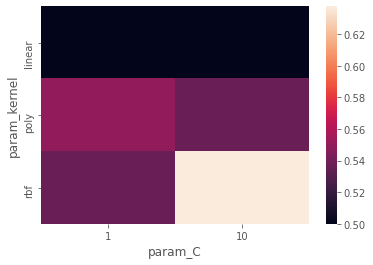

In [115]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C = randint(low=1,high=100)
#param_grid = {'kernel':['rbf', 'poly'], 'C': np.random.randint(low=1,high=100), 'gamma': uniform(loc=0, scale=1)}
param_grid = {'kernel': ['poly', 'rbf', 'linear'], 'degree':[2], 'C': [1, 10]}
#result = svm.SVC(C = 1, degree = 2, gamma = 0.1, kernel = 'poly')
print(param_grid)
grid = GridSearchCV(svm.SVC(), param_grid, cv=10)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
import pandas as pd
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_kernel', columns='param_C')
ax = sns.heatmap(pvt)
plt.show()
#C = 1, degree = 2, gamma = 0.1, kernel = 'poly'

In [44]:
from scipy.stats import randint, uniform
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])